<a href="https://colab.research.google.com/github/PaolaPina3228/Simulaci-n-2/blob/main/Tarea_servidores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

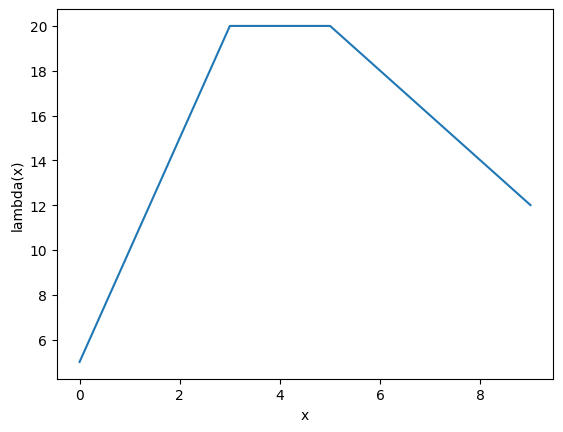

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función lambda
def lambda_func(x):
    return (5 + 5 * x) * (x < 3) + 20 * (x >= 3) * (x < 5) + (20 - 2 * (x - 5)) * (x >= 5) * (x <= 9)

# Graficamos lambda
x_vals = np.linspace(0, 9, 100)
y_vals = [lambda_func(x) for x in x_vals]
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('lambda(x)')
plt.show()

# Variables iniciales
S = []
I = [1, 5, 20, 18, 16, 14]
te = [1, 2, 6, 7, 8, 9]
cierre = 9
k = len(te)

# Función propocis2
def propocis2():
    t = 0
    M = 0
    J = 0  # Índice en Python empieza desde 0
    H = 0
    while True:
        X = -(1 / I[J]) * np.log(np.random.uniform(0, 1))
        if (t + X + te[J]) <= cierre:
            t += X

        u2 = np.random.uniform(0, 1)
        if u2 <= lambda_func(t) / I[J]:
            M += 1
            S.append(t)

        if u2 > lambda_func(t) / I[J]:
            if X + t > te[J] + t:
                J += 1

        if (t + te[J] == cierre):
            break

    print('Tasa de aceptación')
    print(len(S) / (M + 1))
    return S

# Llamamos a la función
LL = propocis2()
LL.append(float('inf'))

# Función para generar el tiempo de servicio
def tserv():
    t = -(1 / 20) * np.log(np.random.uniform(0, 1))
    return t

# Evolución del sistema (unserv)
def unserv(LL, cierre):
    t = 0  # Variable de tiempo
    NLL = 0  # Contador de llegadas
    NS = 0  # Contador de salidas
    SS = 0  # Clientes en el sistema
    n = 0  # Inicialización de clientes
    Y = []  # Tiempo de atención
    Sal = []  # Output instantes de salida
    c = []  # Clientes en el sistema
    Tp = 0  # Tiempo después del cierre
    i = 0
    j = 0
    tLL = LL[i]  # Instante de llegada del cliente 1
    tS = float('inf')  # Instante de salida del cliente 1
    tm = []  # Tiempo cliente en el sistema

    while True:
        # Caso 1: llegada de cliente
        if (tLL <= tS) and (tLL <= cierre):
            t = tLL  # Al instante de llegada
            NLL += 1  # Contador de número de llegadas
            i += 1
            tLL = LL[i]  # Leemos las llegadas
            n += 1
            SS += 1  # SS: número de clientes en el sistema
            c.append(n)  # Registramos número de clientes
            if n == 1:  # Si es el único cliente
                Y.append(tserv())  # Tiempo de atención
                tS = t + Y[j]  # Asignamos tiempo de atención
                j += 1

        # Caso 2: salida de cliente
        elif (tS <= tLL) and (tS <= cierre):
            t = tS  # Instante de salida
            NS += 1
            n -= 1
            c.append(n)
            Sal.append(t)
            tm.append(Sal[NS - 1] - LL[NS - 1])  # Tiempo en el sistema
            if n > 0:  # Si hay más clientes
                Y.append(tserv())
                tS = t + Y[j]
                j += 1
            else:
                tS = float('inf')  # Si no hay más clientes

        # Caso 3: después de la hora de cierre
        elif min(tLL, tS) > cierre:
            if n > 0:  # Si hay clientes, generamos tiempo de servicio
                t = tS
                NS += 1
                n -= 1
                c.append(n)
                Sal.append(t)
                tm.append(Sal[NS - 1] - LL[NS - 1])
                if n > 0:
                    Y.append(tserv())
                    tS = t + Y[j]
                    j += 1
            else:
                tS = float('inf')
            if n == 0:
                break

        # Caso 4: si no quedan clientes
        if n == 0:
            Tp = max(t - cierre, 0)
            break

    resultados = {
        'tiempo en el sistema': tm,
        'clientes en el sistema': c,
        'tiempo medio cliente en el sistema': np.mean(tm),
        'número medio clientes en el sistema': np.mean(c),
        'tiempo después del cierre': Tp,
        'última salida': tS
    }

    return resultados

# Llamamos a la función unserv
resultados = unserv(LL, 9)
print(resultados)

# Función para tiempos de cierre
def tcierre(n):
    tc = []
    for i in range(n):
        resultados = unserv(LL, 9)
        tc.append(resultados['última salida'])
    return tc

# Graficamos los tiempos de cierre para n jornadas
tc = tcierre(100)
plt.plot(tc, type='1')
plt.show()